In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
raw_data = pd.read_excel('../../data/raw_data.xlsx')

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1862 entries, 0 to 1861
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   REGISTRATION     1862 non-null   int64 
 1   BRANCH           1862 non-null   object
 2   AREA             1862 non-null   object
 3   NAME             1862 non-null   object
 4   GENDER           1862 non-null   object
 5   ETHNICITY        1862 non-null   object
 6   JOB_TITLE        1862 non-null   object
 7   SALARY           1862 non-null   int64 
 8   CONTRACT_TYPE    1862 non-null   object
 9   EDUCATION        1862 non-null   object
 10  PWD              1862 non-null   int64 
 11  CONTRACT_TIME    1862 non-null   object
 12  AGE_RANGE        1862 non-null   object
 13  CONTRACT_REGIME  1862 non-null   object
dtypes: int64(3), object(11)
memory usage: 203.8+ KB


In [4]:
raw_data['SALARY'].describe()

count     1862.000000
mean      7676.168636
std       6739.893225
min         37.000000
25%       3038.000000
50%       5810.500000
75%      10798.000000
max      72579.000000
Name: SALARY, dtype: float64

In [5]:
raw_data['PWD'] = raw_data['PWD'].astype(str)

In [6]:
categorical_variables = [
    'GENDER', 'ETHNICITY','CONTRACT_TYPE', 'EDUCATION', 'PWD',
    'CONTRACT_TIME', 'AGE_RANGE', 'CONTRACT_REGIME'
]

In [7]:
for column in categorical_variables:
    print(raw_data[column].value_counts())
    print()

M    1209
F     653
Name: GENDER, dtype: int64

HISPANIC             924
WHITE                603
BLACK                307
ASIAN                 14
PREFER NOT TO SAY     14
Name: ETHNICITY, dtype: int64

Indefinite-Term    1548
Definite-Term       314
Name: CONTRACT_TYPE, dtype: int64

Bachelor's Degree          758
High School                384
Postgraduate               224
Master's Degree            214
Doctorate                  146
Technical                  126
Incomplete Postgraduate      6
Postdoctoral                 3
Elementary School            1
Name: EDUCATION, dtype: int64

0    1789
1      73
Name: PWD, dtype: int64

1 - 3 Contract Years     648
< 1 Contract Year        574
> 10 Contract Years      253
3 - 5 Contract Years     205
5 - 10 Contract Years    182
Name: CONTRACT_TIME, dtype: int64

30 - 35 Years    382
35 - 40 Years    344
25 - 30 Years    321
40 - 45 Years    265
45 - 50 Years    185
20 - 25 Years    123
50 - 55 Years    115
55 - 60 Years     63
> 60 Years

In [8]:
raw_data[['REGISTRATION','JOB_TITLE']].groupby('JOB_TITLE').count().reset_index().sort_values('REGISTRATION', ascending=False)

,JOB_TITLE,REGISTRATION
105,Technical Specialist Mid.,278
104,Technical Specialist Jr.,150
21,Business Process Assistant,143
14,Business Consultant Jr.,108
96,Specialized Technician Mid.,91
...,...,...
28,CEO,1
72,Process Coordinator - Administrative,1
73,Process Coordinator - Engineering,1
74,Process Coordinator - Systems Mid.,1


### Focusing on developement of a salary model on the Technical Specialist job titles

In [9]:
raw_data_tech_specialist = raw_data[raw_data['JOB_TITLE'].str.contains('Technical Specialist')]

In [20]:
plt.rcParams['figure.figsize'] = (14,6)

[Text(0, -50, '136'), Text(0, -50, '391')]

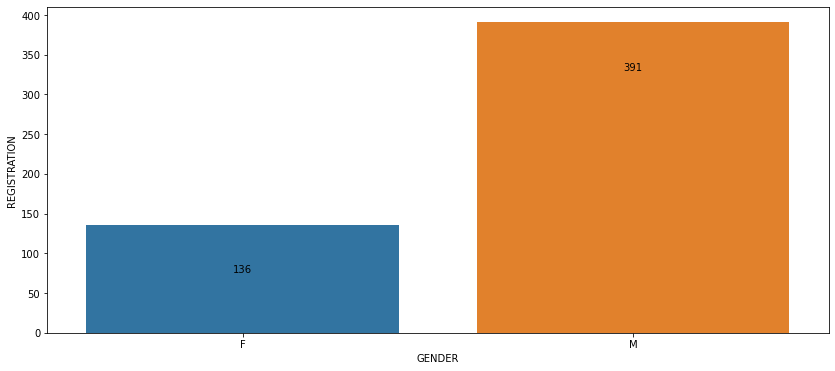

In [21]:
ax = sns.barplot(x='GENDER', y='REGISTRATION', data=raw_data_tech_specialist[['REGISTRATION','GENDER']].groupby('GENDER').count().reset_index())
ax.bar_label(ax.containers[0], fontsize=10, padding=-50)

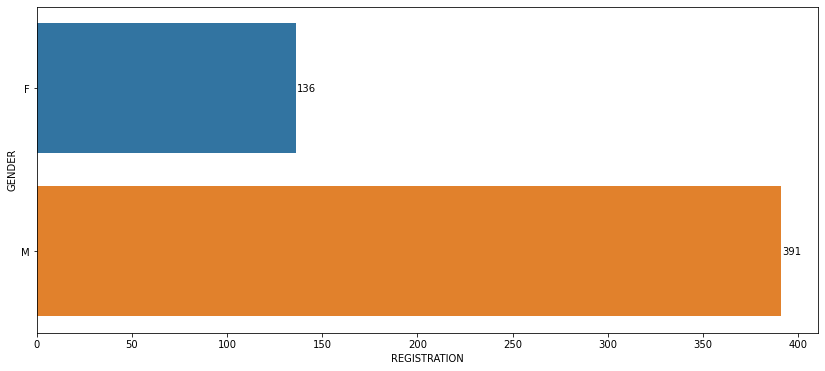

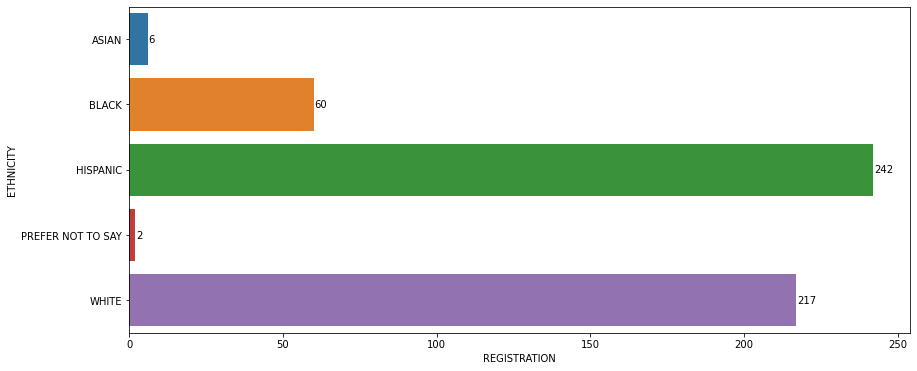

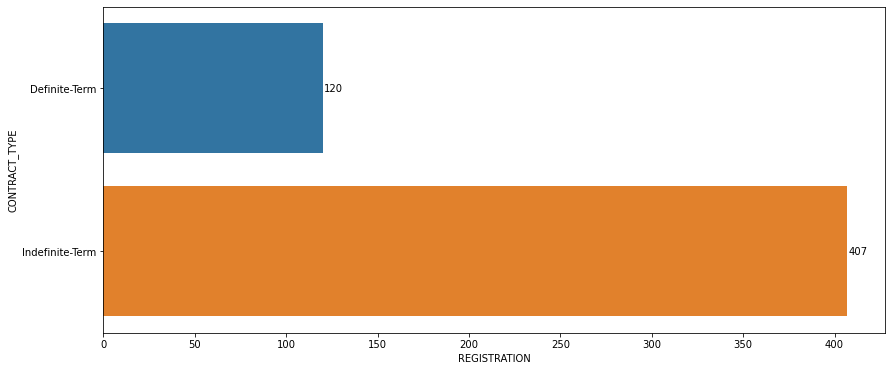

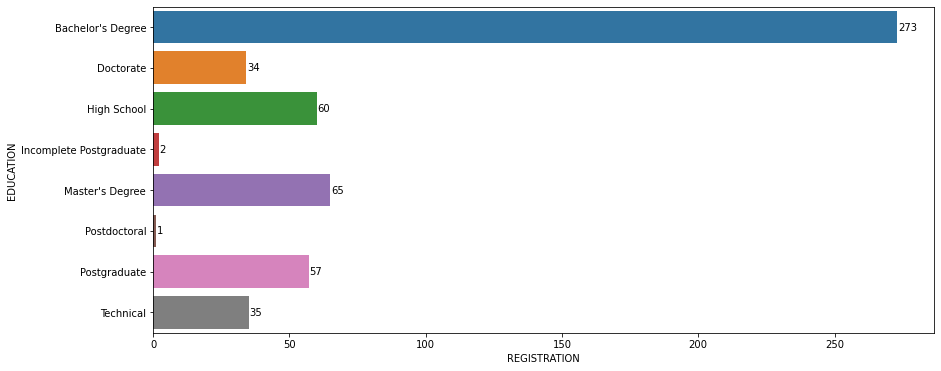

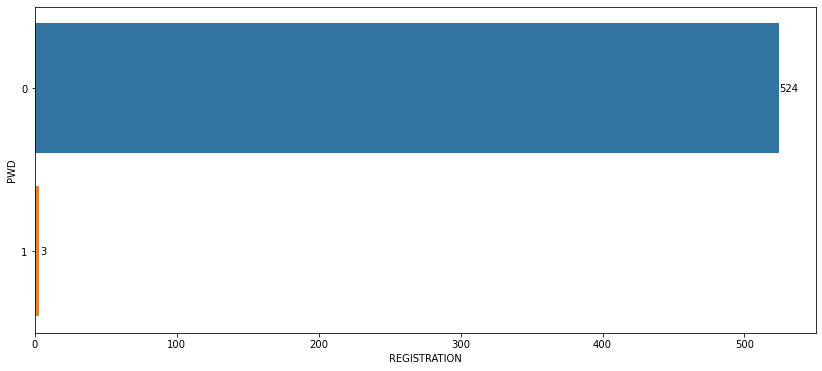

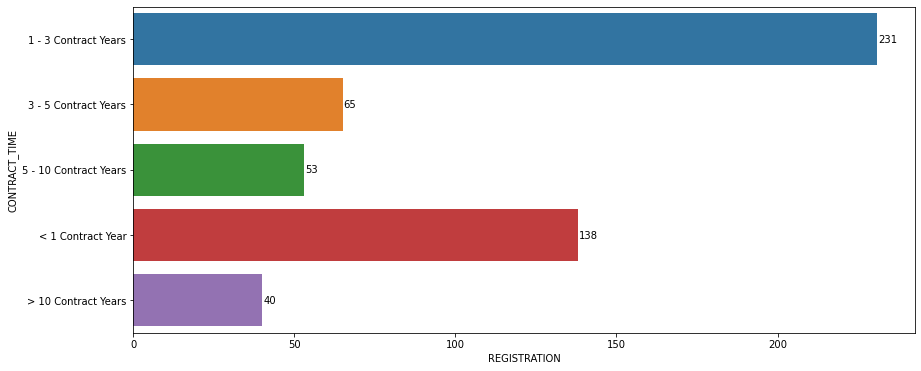

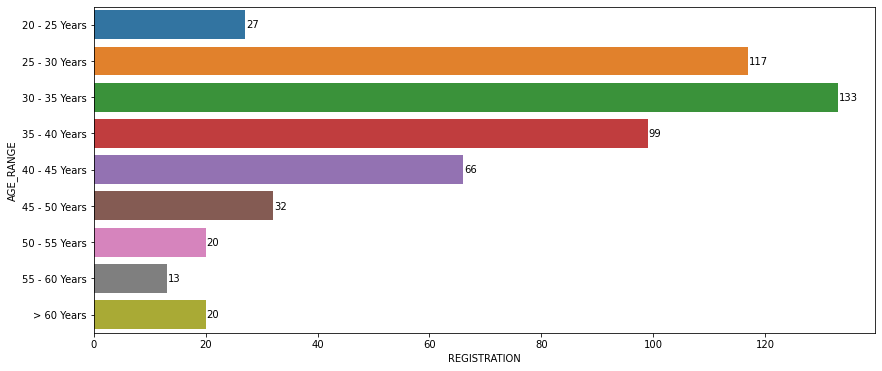

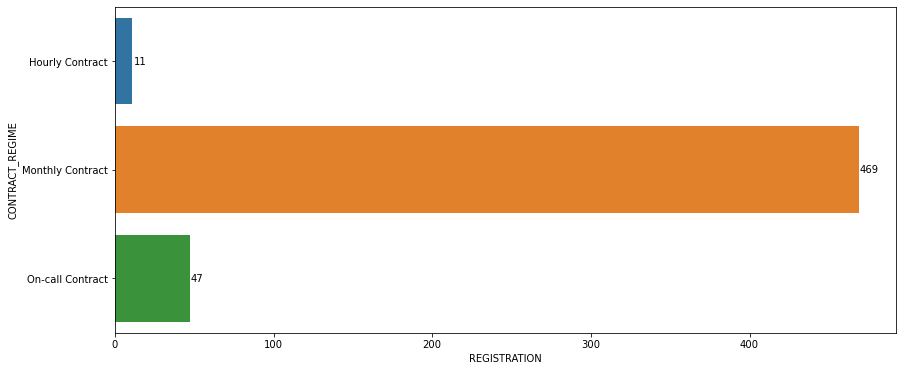

In [22]:
for column in categorical_variables:
    ax = sns.barplot(x='REGISTRATION', y=column, data=raw_data_tech_specialist[[column,'REGISTRATION']].groupby(column).count().reset_index())
    ax.bar_label(ax.containers[0], fontsize=10, padding=1)
    plt.show()